### **Loading in the data**

Out of curiosity I decided to compare pandas, Polars and PySpark to learn more about the libraries and their potential for big data analysis. PySpark mainly shines with very big data. <br> I used csv files from a project I'm currently working on.

In [16]:
# Importing necessary libraries
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

from pyspark.sql import SparkSession

### **pandas**

In [17]:
# Start the timer
start_time = time.time()

df_2020 = pd.read_csv('fangstdata_2020.csv', sep=';', low_memory=False)
df_2021 = pd.read_csv('fangstdata_2021.csv', sep=';', low_memory=False)
df_2022 = pd.read_csv('fangstdata_2022.csv', sep=';', low_memory=False)
df_2023 = pd.read_csv('fangstdata_2023.csv', sep=';', low_memory=False)
df_2024 = pd.read_csv('fangstdata_2024.csv', sep=';', low_memory=False)

# End the timer
end_time = time.time()

pd_execution_time = end_time - start_time

# Print the execution time
print(f'Loading in the data using Pandas took {pd_execution_time:.3f} seconds.')

Loading in the data using Pandas took 91.027 seconds.


### **Polars**

In [23]:
# Start the timer
start_time = time.time()

df_2020 = pl.read_csv('fangstdata_2020.csv', separator=';', ignore_errors=True)
df_2021 = pl.read_csv('fangstdata_2021.csv', separator=';', ignore_errors=True)
df_2022 = pl.read_csv('fangstdata_2022.csv', separator=';', ignore_errors=True)
df_2023 = pl.read_csv('fangstdata_2023.csv', separator=';', ignore_errors=True)
df_2024 = pl.read_csv('fangstdata_2024.csv', separator=';', ignore_errors=True)

# End the timer
end_time = time.time()

pl_execution_time = end_time - start_time

# Print the execution time
print(f'Loading in the data using Polars took {pl_execution_time:.3f} seconds.')

Loading in the data using Polars took 13.823 seconds.


Polars is clearly a lot quicker than Pandas for loading in large files (> 1 GB)

### **PySpark**

In [24]:
# Start the timer
start_time = time.time()

# Create SparkSession
spark = SparkSession.builder.appName('Fangstdata').getOrCreate()

# Load each year's "fangstdata", with a csv separator ";"
df_2020 = spark.read.csv('fangstdata_2020.csv', sep=';', header=True, inferSchema=True)
df_2021 = spark.read.csv('fangstdata_2021.csv', sep=';', header=True, inferSchema=True)
df_2022 = spark.read.csv('fangstdata_2022.csv', sep=';', header=True, inferSchema=True)
df_2023 = spark.read.csv('fangstdata_2023.csv', sep=';', header=True, inferSchema=True)
df_2024 = spark.read.csv('fangstdata_2024.csv', sep=';', header=True, inferSchema=True)

# End the timer
end_time = time.time()

pyspark_execution_time = end_time - start_time

# Print the execution time
print(f'Loading in the data using PySpark took {pyspark_execution_time:.3f} seconds.')

Loading in the data using PySpark took 22.660 seconds.


And so is PySpark.

### **Comparison plot**

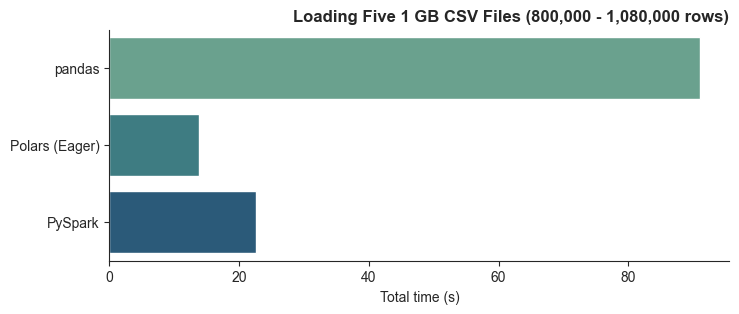

In [42]:
# Data for the bar chart comparison
exec_time = [pd_execution_time, pl_execution_time, pyspark_execution_time]
libraries = ['pandas', 'Polars (Eager)', 'PySpark']

comparison = pd.DataFrame({'Libraries' : libraries, 
                           'Execution time' : exec_time})

plt.figure(figsize=(8,3))
sns.set_style('ticks')

# Execution time comparison plot
sns.barplot(x='Execution time', 
            y='Libraries',
            hue='Libraries', 
            data=comparison, 
            palette='crest')

sns.despine()
plt.ylabel('')
plt.xlabel('Total time (s)')
plt.title('Loading Five 1 GB CSV Files (800,000 - 1,080,000 rows)', 
          loc='right', 
          fontdict={'fontweight':'semibold', 'fontsize':12})

plt.savefig('speed_test.png', dpi=100, bbox_inches='tight')